# Paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crossroad_width = 42
crossroad_height = 10

In [3]:
# Armo el mapa del cruce

waiting_area = 'W'
street_cell = 'S'
x_cells = crossroad_width
y_cells = crossroad_height

map = np.array([[waiting_area]+[street_cell for number in range(x_cells)]+[waiting_area] for i in range(0,y_cells)])

In [4]:
pedestrians = []
vehicles = []

In [5]:
lambdapk = 0.7 # tasa de arribo de peatones (arribo / seg)
lambdavk = 0.6 # tasa de arribo de autos (arribo / seg)

def get_new_pedestrians():
    return np.random.poisson(lambdapk)

def get_new_cars():
    return np.random.poisson(lambdavk)

Hello


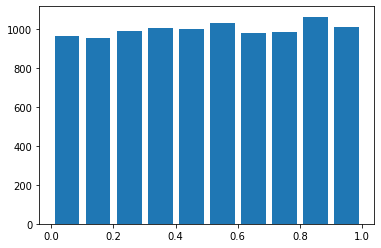

2
2
3
4
5
6


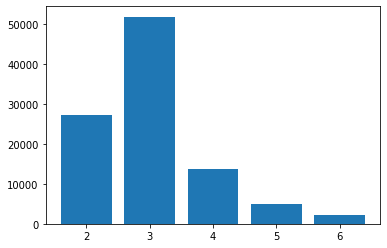

Límite superior: 9.487729036781154
D2: 5.177128632012732
El test no rechaza la hipotesis nula.


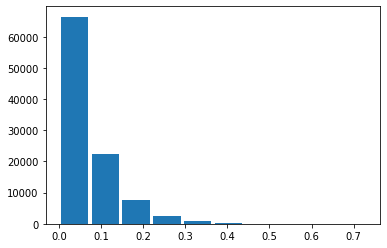

4.588534807527386e-06


./Ejercicios.ipynb:5: RuntimeWarning: divide by zero encountered in double_scalars
  "execution_count": 1,
./Ejercicios.ipynb:5: RuntimeWarning: invalid value encountered in double_scalars
  "execution_count": 1,


Rendimiento: 0.0009


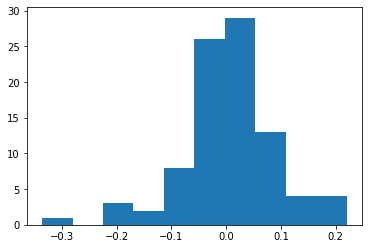

Done


In [6]:
%run ./Ejercicios.ipynb
foo()

In [7]:
def get_initial_velocity():
    return find_label(random.uniform(0, 1), proba_vector)

In [8]:
get_initial_velocity()

3

In [227]:
MAX_DISTANCE = 10000 

class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def x(self):
        return self.x
    
    def y(self):
        return self.y
    
    def is_negative(self):
        return (self.x < 0) | (self.y < 0)

class Matrix:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
        self.matrix = []
        for i in range(0, 10):
            self.matrix.append([])
            for j in range(0, 10):
                self.matrix[i].append(None)

        
    def put(self, position_x, position_y, object):
        self.matrix[position_x][position_y] = object
        
    def is_empty(self, position_x, position_y):
        return self.matrix[position_x][position_y] == None
        
    def distance_to_next_object(self, position_x, position_y, direction):
        position_x += direction
        distance = 0
        while ((0 <= position_x) & (position_x < self.width)) & (distance < MAX_DISTANCE):
            if self.matrix[position_x][position_y] != None:
                return distance
            distance += 1
            position_x += direction
        return -1
    
            
    def get_next_object(self, position_x, position_y, direction):
        position_x += direction
        distance = 0
        while ((0 <= position_x) & (position_x < self.width)) & (distance < MAX_DISTANCE):
            if self.matrix[position_x][position_y] != None:
                return self.matrix[position_x][position_y]
            distance += 1
            position_x += direction
        return None
    
    def get(self):
        print(self.matrix)

In [229]:
s = Semaforo(10,10)
pos = Position(3,2)
m = Matrix(10,10)
p = Pedestrian(pos, 3)

In [230]:
s.is_red()

False

In [231]:
p.set_in_matrix(m)

In [236]:
n = p.avanzar(m, s)
print(n.x, n.y)

2 2


In [228]:
class Pedestrian:
    def __init__(self, position, velocity):
        self.position = position
        self.direction = 'right'
        self.velocity = velocity
        self.next_position = None
       
    def set_in_matrix(self, matrix):
        matrix.put(self.position.x, self.position.y, self)
        
    def avanzar(self, matrix, semaforo):
        if semaforo.is_red():
            
            if self.position.is_negative(): # no empezo a cruzar
                return
        
            # Semaforo rojo y estaba cruzando, avanza a maxima velocidad
            self.velocity = 6
            self.next_position = Position(self.position.x + 6, self.position.y)
            return self.next_position
        
        else:  # Semaforo verde
            if self.position.is_negative(): # no empezo a cruzar
                locate()
                
            self.move_forward(matrix) 
            if not self.next_position:  # Posicion ocupada
                lane_change(matrix)
            return self.next_position
            
    
    # Establece su posicion y direccion inicial
    def locate(self):
        # cambiar por posiciones al azar
        self.position = Position(0,0)
        self.direction = 'right'
        
        
    def move_forward(self, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        d = matrix.distance_to_next_object(self.position.x, self.position.y, direction)
        if d == 0:
            return None
        
        self.next_position = Position(self.position.x + self.velocity * direction, self.position.y)
        self.update_velocity(matrix)
        
        
    def update_velocity(self, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        d = matrix.distance_to_next_object(self.position.x, self.position.y, direction)
        self.velocity = min(d, self.velocity)
        

    def lane_change(self, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        d = matrix.distance_to_next_object(self.position.x, self.position.y, direction)
        if d != 0: 
            return
        if can_turn_right(matrix) & can_turn_left(matrix):
            if (np.random() < 0.5):
                turn_right()
            else:
                turn_left()
        elif can_turn_right(matrix):
            turn_right()
        elif can_turn_left(matrix):
            turn_left()
            
    
    def turn_right(self):
        self.next_position = Position(self.position.x, self.position.y + 1)
    
    def turn_left(self):
        self.next_position = Position(self.position.x, self.position.y - 1)
        
                                      
    def can_turn_right(self, matrix):
        return ( not matrix.is_empty(self.position.x, self.position.y + 1)) & \
               (velocity_higher_than_last(self.position.y + 1, matrix)) & \
               (velocity_less_than_next(self.position.y + 1))
                                      
    def can_turn_left(self, matrix):
        return (not matrix.is_empty(self.position.x, self.position.y - 1)) & \
               (velocity_higher_than_last(self.position.y - 1, matrix)) & \
               (velocity_less_than_next(self.position.y - 1))
        
    def velocity_higher_than_last(self, position_y, matrix):
        if self.direction == 'right':
            direction = -1
        elif self.direction == 'left':
            direction = 1
        last_pedestrian = matrix.get_next_object(self.position.x, position_y, direction)
        return self.velocity > last_pedestrian.velocity    
                
    def velocity_less_than_next(self, position_y, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        distance = matrix.distance_to_next_object(self.position.x, position_y, direction)
        return self.velocity < distance
 
                                      
    def __str__(self):
        return 'Pos {0} Vel {1}'.format(self.position, self.velocity)

class Car:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        size_x = 6
        size_y = 5
        
        
    def set_in_matrix(matrix):
        # con todas las posiciones
        matrix.put(self.position.x, self.position.y, self)
        
    def __str__(self):
        return 'Pos {0} Vel {1}'.format(self.position, self.velocity)

class Semaforo:
    def __init__(self, tiempo_verde, tiempo_rojo):
        # Semaforo rojo significa que el peaton NO PODRÍA CRUZAR y el auto SI
        self.estado = 'verde'
        self.timer = 0
        self.tiempo_verde = tiempo_verde
        self.tiempo_rojo = tiempo_rojo
    
    def iterar(self, t):
            self.timer += 1
            if(self.estado == 'verde' and self.timer > self.tiempo_verde):
                self.timer = 0
                self.estado = 'rojo'
                
            elif(self.estado == 'rojo' and self.timer > self.tiempo_rojo):
                self.timer = 0
                self.estado = 'verde'
                
    def is_red(self):
        return self.estado == 'rojo'
                
    def __str__(self):
        return 'Estado {0}'.format(self.estado)


In [164]:
for i in range(get_new_pedestrians()):
    p_position = (0, random.randint(0, y_cells))
    p_velocity = get_initial_velocity()
    p = Pedestrian(p_position, p_velocity)
    print(p)
    pedestrians.append(p)
    #if ()
    #map[p.position.1, p.position.2]

In [165]:
len(pedestrians)

3

In [166]:
class State:
    def __init__(self, position, velocity):
        cars = []
        pedestrians = []
        crossroad_width = 42
        crossroad_height = 10
        semaforo_tiempo_verde = 5
        semaforo_tiempo_rojo = 20
        nro_iteracion = 0
        cantidad_iteraciones = 100
        semaforo = Semaforo(semaforo_tiempo_verde, semaforo_tiempo_rojo)
        
        #llegada_peatornes = Poisson ???
        #llegada_vehiculos = Poisson ???
        
        
        
        
    def iterar():
        
        # llegada de peatones
        # llegada de autos
        
        #avanzar de estado el semaforo
        semaforo.iterar(1)
        
        matriz = get_positions_matrix() 
        
        # Avanzo peatones               
        for peaton in pedestrians:
            # Debería devolver conflictos peaton espera auto
            peaton.avanzar(matriz, semaforo)
        
        # Avanzo autos
        for auto in cars:
            # Debería devolver confflictos de tipo auto espera peaton (1)
            auto.avanzar(peatones, autos, semaforo)
        
        
    def __str__(self):
        return 'Iteracion {0}'.format(self.nro_iteracion)
    
    def get_matrix():
        ''' Devuelve la matriz lista para ser dibujada'''
        return [[]]
    
    def get_positions_matrix():
        m = Matrix(crossroad_width, crossroad_height)
        for car in cars:
            car.set_in_matrix(m)
            
        for pedetrian in pedestrians:
            pedetrian.set_in_matrix(m)
        return m
                
            